In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set paths for file navigation
BASE_DIR = pathlib.Path().resolve().parent
DATA_DIR = BASE_DIR / 'data'

In [3]:
nonzero_earners = DATA_DIR / 'processed/non-zero earners.csv'

In [4]:
df_nonzero_earners = pd.read_csv(nonzero_earners)
df_nonzero_earners.head(5)

,organization_id,organization_owner_id,total_revenue_2021,revenue_realized_to_date_usd,time_entries_count,billable_time_entries_count,hours_tracked,billable_hours_tracked,clients_used,projects_used,billable_projects_used,country,industry,company_type,approximate_employees,reported_annual_revenue
0,4371248,3823892,79612.9,186161.4,2720337,1146268,5.261245e+06,2.655264e+06,184,1243,981,Poland,Internet Software & Services,private,NaN,NaN
1,4321223,2261811,74800.0,170629.0,359584,343625,9.334017e+05,9.007908e+05,999,1740,1717,United States,Internet Software & Services,private,45.0,NaN
2,4974044,6531377,58441.5,74400.3,214387,80644,4.892082e+05,1.117092e+05,1243,2521,2516,United Kingdom,NaN,NaN,NaN,NaN
3,3421574,4123264,35838.0,131010.6,1277234,930451,1.129270e+06,9.007524e+05,16,43,36,United States,Internet Software & Services,public,1500.0,2.482000e+08
4,4050064,5264562,33076.8,61776.8,232052,163,2.710665e+05,1.149547e+02,0,559,5,United States,Internet Software & Services,public,100030.0,1.113900e+10


In [5]:
#get all the categorical variables
cat_vars = [var for var in df_nonzero_earners.columns if df_nonzero_earners[var].dtype == 'O']

#we have to add org_id and org_owner_id as they are also categorical
cat_vars = cat_vars + ['organization_id','organization_owner_id']

#cast all categorical variables to dtype object
df_nonzero_earners[cat_vars] = df_nonzero_earners[cat_vars].astype('O')

In [7]:
#filter dataset to only the top earners. We will start with 8100 first
df_top_earners = df_nonzero_earners[df_nonzero_earners['total_revenue_2021'] > 8100]
df_top_earners.head(5)

,organization_id,organization_owner_id,total_revenue_2021,revenue_realized_to_date_usd,time_entries_count,billable_time_entries_count,hours_tracked,billable_hours_tracked,clients_used,projects_used,billable_projects_used,country,industry,company_type,approximate_employees,reported_annual_revenue
0,4371248,3823892,79612.9,186161.4,2720337,1146268,5.261245e+06,2.655264e+06,184,1243,981,Poland,Internet Software & Services,private,NaN,NaN
1,4321223,2261811,74800.0,170629.0,359584,343625,9.334017e+05,9.007908e+05,999,1740,1717,United States,Internet Software & Services,private,45.0,NaN
2,4974044,6531377,58441.5,74400.3,214387,80644,4.892082e+05,1.117092e+05,1243,2521,2516,United Kingdom,NaN,NaN,NaN,NaN
3,3421574,4123264,35838.0,131010.6,1277234,930451,1.129270e+06,9.007524e+05,16,43,36,United States,Internet Software & Services,public,1500.0,2.482000e+08
4,4050064,5264562,33076.8,61776.8,232052,163,2.710665e+05,1.149547e+02,0,559,5,United States,Internet Software & Services,public,100030.0,1.113900e+10


In [8]:
len(df_top_earners)

118

In [36]:
df_top_earners.sort_values('total_revenue_2021', ascending=False).head(20)

,organization_id,organization_owner_id,total_revenue_2021,revenue_realized_to_date_usd,time_entries_count,billable_time_entries_count,hours_tracked,billable_hours_tracked,clients_used,projects_used,billable_projects_used,country,industry,company_type,approximate_employees,reported_annual_revenue,country_cleaned,pct_billable_time_entries,pct_billable_hours_tracked,pct_billable_projects_used
0,4371248,3823892,79612.9,186161.40,2720337,1146268,5.261245e+06,2.655264e+06,184,1243,981,Poland,Internet Software & Services,private,NaN,NaN,Others,0.421370,0.504684,0.789220
1,4321223,2261811,74800.0,170629.00,359584,343625,9.334017e+05,9.007908e+05,999,1740,1717,United States,Internet Software & Services,private,45.0,NaN,United States,0.955618,0.965062,0.986782
2,4974044,6531377,58441.5,74400.30,214387,80644,4.892082e+05,1.117092e+05,1243,2521,2516,United Kingdom,NaN,NaN,NaN,NaN,Others,0.376161,0.228347,0.998017
3,3421574,4123264,35838.0,131010.60,1277234,930451,1.129270e+06,9.007524e+05,16,43,36,United States,Internet Software & Services,public,1500.0,2.482000e+08,United States,0.728489,0.797641,0.837209
4,4050064,5264562,33076.8,61776.80,232052,163,2.710665e+05,1.149547e+02,0,559,5,United States,Internet Software & Services,public,100030.0,1.113900e+10,United States,0.000702,0.000424,0.008945
5,4257980,178672,31995.2,98474.00,1498882,1153235,1.043863e+06,7.263733e+05,666,3313,3299,United States,Internet Software & Services,private,NaN,NaN,United States,0.769397,0.695851,0.995774
6,5340642,6010897,31478.4,43329.60,283660,147114,1.831544e+05,7.962909e+04,1441,3523,3437,United States,Pharmaceuticals,public,12000.0,2.518000e+09,United States,0.518628,0.434765,0.975589
7,4032766,1917001,31425.3,78715.00,835009,678466,1.037235e+06,8.720558e+05,197,476,432,United States,Internet Software & Services,private,30.0,NaN,United States,0.812525,0.840750,0.907563
8,4191380,3836277,30096.0,61871.60,849567,415,5.401047e+05,4.675594e+02,0,11,0,Netherlands,Internet Software & Services,private,11970.0,NaN,Others,0.000488,0.000866,0.000000
9,4499946,5982879,29088.0,31824.00,18488,1682,5.870259e+04,1.908483e+03,3,15,0,United States,Education Services,education,8397.0,NaN,United States,0.090978,0.032511,0.000000


First let's see if there were any standout orgs this year. We can plot revenue from 2021 vs all time revenue to see this.

<AxesSubplot:xlabel='total_revenue_2021', ylabel='revenue_realized_to_date_usd'>

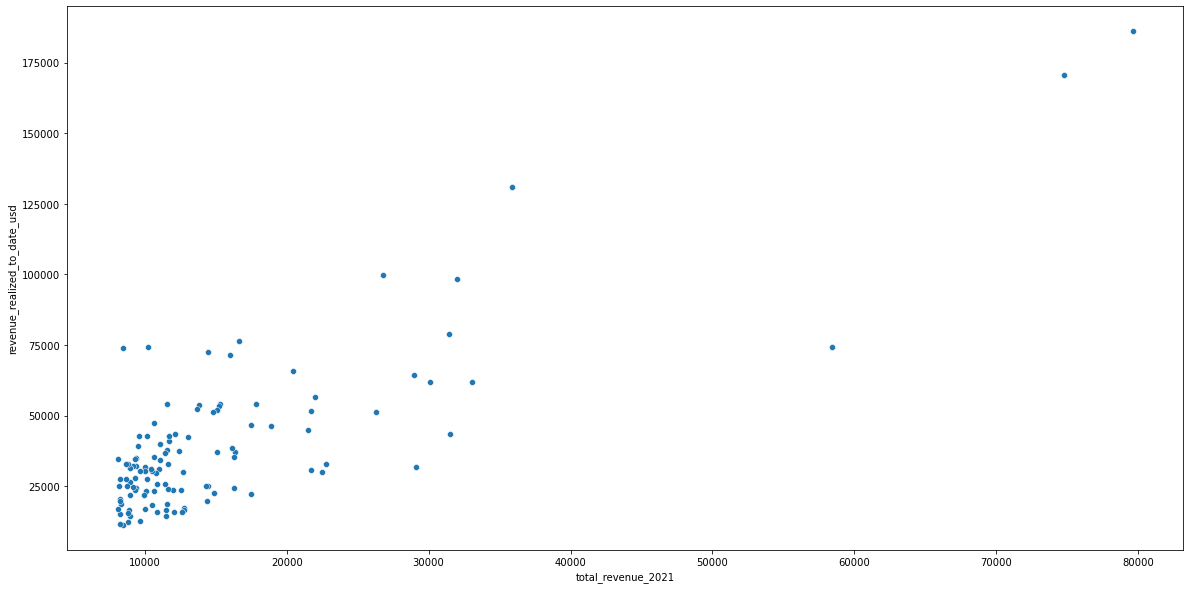

In [9]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_top_earners, x='total_revenue_2021', y='revenue_realized_to_date_usd')

Looks like there were a few orgs who made a large % of their all time revenue in 2021 alone! Might be worth checking these orgs, to see if something encouraged them to commit more this year. Or perhaps they are simply quite recent customers, thus the bulk of their spending was in 2021.

Text(0, 0.5, 'Count')

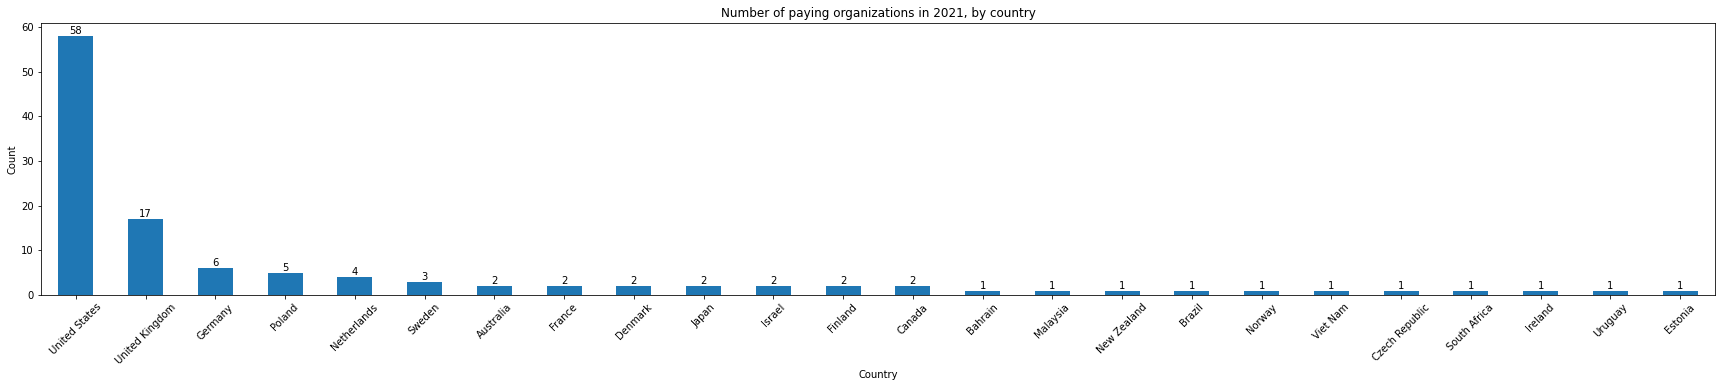

In [15]:
plt.figure(figsize=(30,5))
fig = df_top_earners['country'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])
plt.title('Number of paying organizations in 2021, by country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')

In [18]:
df_top_earners['pct_billable_time_entries'] = df_top_earners['billable_time_entries_count']/df_top_earners['time_entries_count']
df_top_earners['pct_billable_hours_tracked'] = df_top_earners['billable_hours_tracked']/df_top_earners['hours_tracked']
df_top_earners['pct_billable_projects_used'] = df_top_earners['billable_projects_used']/df_top_earners['projects_used']

I'd like to see the figures by country.

In [33]:
def analyze_metrics_by_country(df, metric):
    df = df.copy()
    tmp = df.groupby('country')[metric].agg(['mean', 'std'])
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=metric)

    plt.show()

In [29]:
metrics = ('total_revenue_2021', 'revenue_realized_to_date_usd', 'pct_billable_time_entries',
           'pct_billable_hours_tracked', 'pct_billable_projects_used', 'approximate_employees',
           'reported_annual_revenue', 'clients_used')

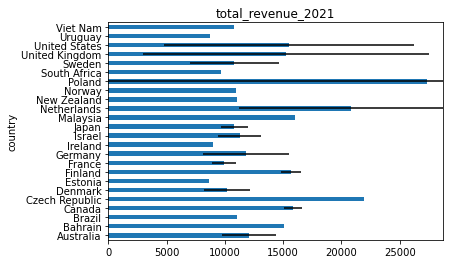

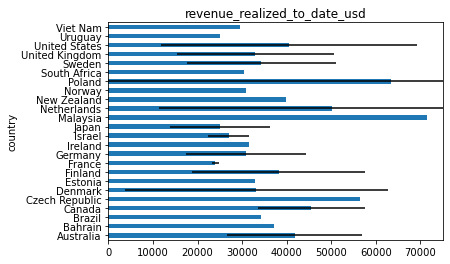

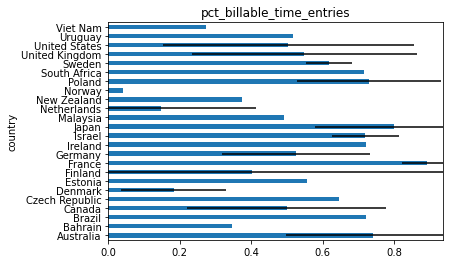

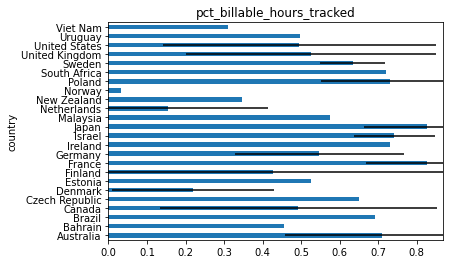

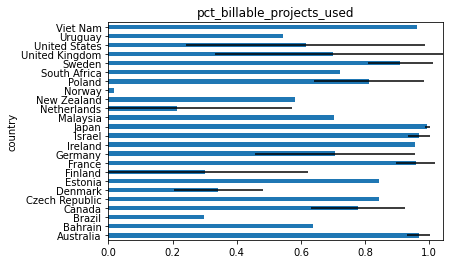

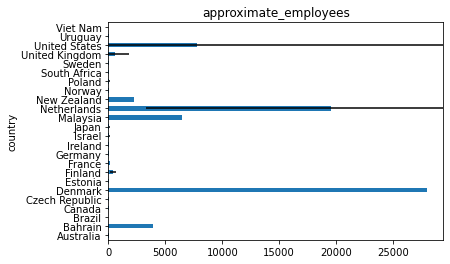

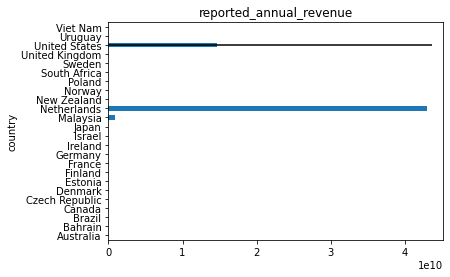

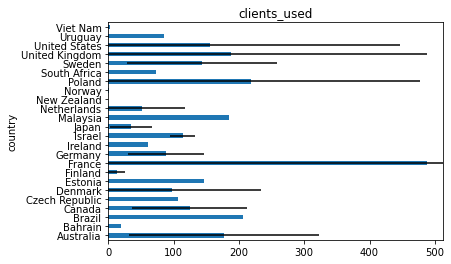

In [34]:
for metric in metrics:
    analyze_metrics_by_country(df_top_earners, metric)